In [25]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import imutils
from skimage import measure

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
licensePlateModel = torch.hub.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\yolov5', 'custom', path=r'E:\IAMDAT\Workplace\DOANCUOIKY\FinalVersion\models\best_lp_4.pt', source='local').to(device)

YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 


In [78]:



img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\DesktopApp\core\images\vehicle\1649952033.0154321.jpg')

def get_plate(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
    bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
    xmin, ymin, xmax, ymax = bbox[0:4]
    img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	
    return img_license_plate

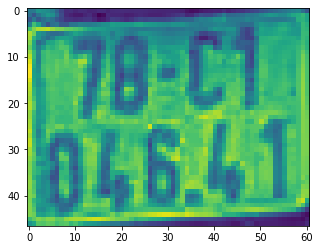

In [81]:

plate_gray = get_plate(img)
plt.imshow(plate_gray)

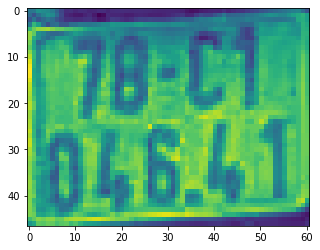

In [69]:
V = cv2.split(cv2.cvtColor(plate, cv2.COLOR_BGR2HSV))[2]
plt.imshow(V)

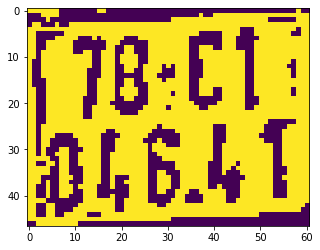

In [70]:
from skimage.filters import threshold_local

T = threshold_local(V, 15, offset=10, method="gaussian")
thresh = (V > T).astype("uint8") * 255

plt.imshow(thresh)

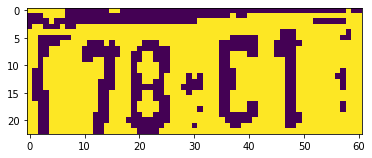

In [203]:
import numpy as np
def applySummFunction(img, axis = 1):
    res = np.sum(img, axis = axis)    #  summ elements in columns
    return res
def splitLine(plate_gray):


    s1 = applySummFunction(plate_gray, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    if deadline<(1/3)*len(s1) - deadline or deadline>(1/3)*len(s1) - deadline :
        deadline = int(len(s1)/2)
    line1 = plate_gray[0:deadline,:]
    line2 = plate_gray[deadline:-1,:]
    return line1, line2

line1, line2 = splitLine(thresh)
plt.imshow(line1)


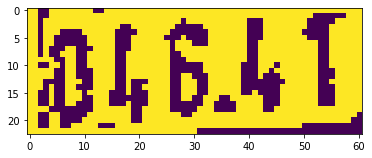

In [204]:
plt.imshow(line2)

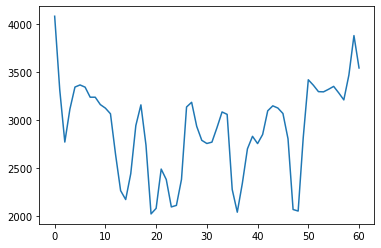

In [186]:
plt.plot(applySummFunction(line1, 0))

In [205]:
def get_mean_distance(arr_filter):
    new_lst = []
    for i in range(1,len(arr_filter)):
        new_lst.append(arr_filter[i]-arr_filter[i-1])
    return np.mean(new_lst)
def filter_poin(line):
    way = applySummFunction(line, 0)

    arr_filter1 = []
    for i in range(1,len(way)-1):
        if (way[i]>way[i-1] and way[i]>way[i+1]):
            arr_filter1.append(i)
    print(arr_filter1)

    mean_points = np.mean(way[arr_filter1])*1/3
    print(mean_points)
    print(way[arr_filter1])

    arr_filter2 = []
    for i in arr_filter1:
        if way[i]>mean_points:
            arr_filter2.append(i)
    print(arr_filter2)
    
    result_list = [0]
    mean_distance = get_mean_distance(arr_filter2)


    i = 0
    while(i<len(arr_filter2)):
        if (np.abs(arr_filter2[i]-arr_filter2[i-1])>mean_distance):
            result_list.append(arr_filter2[i])
        i+=1
    return result_list
        


In [195]:
np.where(way[np.max(way[1,2])])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [206]:
filter_poin(line2)

[4, 8, 12, 14, 18, 29, 33, 38, 58]
1671.6666666666667
[4845 4335 5610 5610 4335 3825 5610 5610 5355]
[4, 8, 12, 14, 18, 29, 33, 38, 58]


[0, 4, 29, 58]

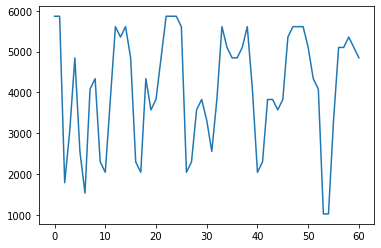

In [207]:
plt.plot(applySummFunction(line2, 0))

[5, 17, 21, 27, 33, 39, 43, 50, 55, 59]
1063.7
[3366 3158 2488 3185 3084 2830 3148 3420 3351 3881]
[5, 17, 21, 27, 33, 39, 43, 50, 55, 59]


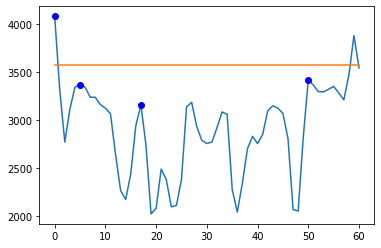

In [198]:

way = applySummFunction(line1, 0)
new_arr = filter_poin(line1)

plt.plot(applySummFunction(line1, 0))
for i in range(len(new_arr)):
    plt.plot(new_arr[i], way[new_arr[i]],'bo')
plt.plot([0,60],[3574,3574])


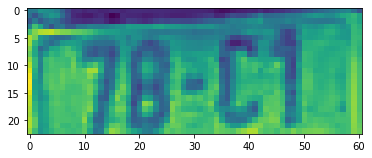

In [188]:
plt.imshow(line1)

In [28]:
import matplotlib.pyplot as pl

In [25]:
import cv2
import numpy as np
import torch

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# init license plate model
licensePlateModel = torch.hub.load('../yolov5', 'custom', path='../models/best_lp_4.pt', source='local').to(device)  # local repo
licensePlateModel.eval()

# init license plate model
model_detetect_number = torch.hub.load('../yolov5', 'custom', path='../models/detect_number_3.pt', source='local').to(device)  # local repo
model_detetect_number.eval()

YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 
YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1807873 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
           

In [26]:
def applySummFunctin(img, axis = 1):
    res = np.sum(img, axis = axis) 
    return res

def splitLine(img):
    if (img.shape[0]/img.shape[1])<(1/3):
        return None

    s1 = applySummFunctin(img, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    if deadline<(1/3)*len(s1) - deadline or deadline>(1/3)*len(s1) - deadline :
        deadline = int(len(s1)/2)    
    return deadline


def sort(bboxes, deadline):
    if deadline == None:
        return bboxes[np.argsort(bboxes[:,-2])]
    else:
        l1 = bboxes[bboxes[:,-1]<deadline]
        l2 = bboxes[bboxes[:,-1]>deadline]
        return np.concatenate((l1[np.argsort(l1[:,-2])], l2[np.argsort(l2[:,-2])]))


def get_license_plate(image ):

        bboxes = licensePlateModel(image).pandas().xyxy[0].to_numpy()
        if len(bboxes)==0:
            return None, 'Cant detect vehicle !'
        bboxes = bboxes[bboxes[:,5]==max(bboxes[:,5])][0]
        xmin, ymin, xmax, ymax = bboxes[0:4]
        img_license_plate = image[int(ymin):int(ymax), int(xmin):int(xmax)]
        
        return img_license_plate, None

def recognize_plate(img_plate):
    img_plate =cv2.cvtColor(img_plate, cv2.COLOR_BGR2GRAY)#COLOR_BGR2GRAY
    bboxes = model_detetect_number(img_plate).pandas().xyxy[0].to_numpy()
    bboxes = np.append(bboxes, (bboxes[:,0]+(bboxes[:,2]-bboxes[:,0])/2).reshape(-1,1), axis = 1)
    bboxes =  np.append(bboxes, (bboxes[:,1]+(bboxes[:,3]-bboxes[:,1])/2).reshape(-1,1), axis = 1)
    deadline = splitLine(img_plate)
    return ''.join(sort(bboxes, deadline)[:,6])

def Full_Detect(image):
    img_plate,err= get_license_plate(image)
    if err != None:
        return 'can\'t detection'   
    return recognize_plate(img_plate)

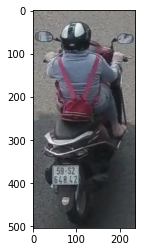

In [90]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\estimation_speed_vehice\images\sub_images\5.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

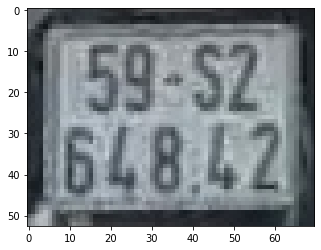

In [91]:
img,_ = get_license_plate(img)
plt.imshow(img)

In [92]:
img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#COLOR_BGR2GRAY
bboxes = model_detetect_number(img).pandas().xyxy[0].to_numpy()

In [93]:
bboxes

array([[23.530004501342773, 8.626970291137695, 30.520265579223633, 25.090303421020508, 0.8981842398643494, 9, '9'],
       [14.545156478881836, 8.542370796203613, 22.38062286376953, 25.200422286987305, 0.8876663446426392, 5, '5'],
       [9.15221118927002, 28.689044952392578, 16.526288986206055, 45.45360565185547, 0.8829169273376465, 6, '6'],
       [48.953372955322266, 8.471360206604004, 56.85048294067383, 25.27590560913086, 0.881744921207428, 2, '2'],
       [54.048492431640625, 27.575603485107422, 62.1909065246582, 44.786407470703125, 0.879725992679596, 2, '2'],
       [19.768922805786133, 28.464311599731445, 26.849687576293945, 45.42057418823242, 0.869669497013092, 4, '4'],
       [30.142499923706055, 28.40058708190918, 37.65154266357422, 45.03962707519531, 0.8685600161552429, 8, '8'],
       [40.1456298828125, 8.28304672241211, 47.69346618652344, 24.93798065185547, 0.8646498918533325, 28, 'S'],
       [43.28252410888672, 27.47148895263672, 51.18377685546875, 45.16572952270508, 0.8

In [94]:
for bbox in bboxes:
    xmin,ymin, xmax , ymax = np.array(bbox[0:4], dtype = int)
    label = bbox[-1]
    img = cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(253, 251, 37), thickness=1)
    img = cv2.putText(img, text=label, org=(xmin, ymin), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(253, 251, 37), thickness=1)

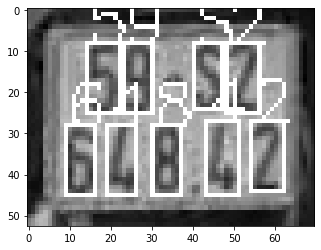

In [96]:
plt.imshow(img,'gray')